In [1]:
import sympy
sympy.init_printing()

# Governing Equations

Conservation of mass

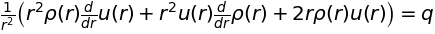

In [2]:
r = sympy.Symbol('r', positive=True)
rho = sympy.Symbol('rho')
u = sympy.Symbol('u')
q = sympy.Symbol('q')
mass_conservation = sympy.Eq((1/r**2)*(r**2*rho(r)*u(r)).diff(r),q)
mass_conservation

Conservation of momentum

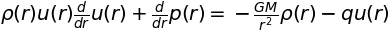

In [3]:
p = sympy.Symbol('p')
G = sympy.Symbol('G', positive=True)
M = sympy.Symbol('M', positive=True)
momentum_conservation = sympy.Eq(rho(r)*u(r)*u(r).diff(r) + p(r).diff(r),
                                 -rho(r)*G*M/r**2-q*u(r))
momentum_conservation

Energy conservation

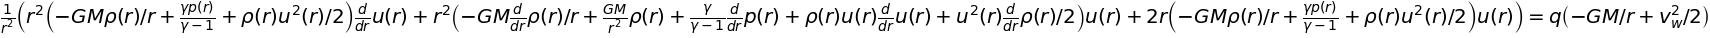

In [4]:
gamma = sympy.Symbol('gamma')
v_w = sympy.Symbol('v_w', positive=True)
energy_conservation = sympy.Eq((1/r**2)*(r**2*u(r)*(rho(r)*u(r)**2/2+gamma*p(r)/(gamma-1)-G*M*rho(r)/r)).diff(r),
         q*(v_w**2/2-G*M/r))
energy_conservation

Mass source term

In [5]:
D = sympy.Symbol('D', positive=True)
eta = sympy.Symbol('eta', positive=True)
mass_source = D*r**(-eta)
mass_source

# Reduction to dimensionless variables

Bondi radius

In [6]:
bondi_radius = G*M/v_w**2
bondi_radius

Bondi density

In [7]:
temp = D*bondi_radius**(-eta)*(bondi_radius/v_w)
temp = sympy.expand_power_base(temp,force=True)
temp = temp.simplify()
bondi_density = temp
bondi_density

Mass conservation

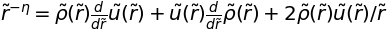

In [8]:
tilde_rho = sympy.Symbol(r'\tilde{\rho}')
tilde_r = sympy.Symbol(r'\tilde{r}')
tilde_u = sympy.Symbol(r'\tilde{u}')
temp = mass_conservation
temp = temp.subs(q, mass_source)
temp = temp.subs(rho(r).diff(r), bondi_density*tilde_rho(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(u(r).diff(r), v_w*tilde_u(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(rho(r), bondi_density*tilde_rho(tilde_r))
temp = temp.subs(u(r), v_w*tilde_u(tilde_r))
temp = sympy.Eq(temp.lhs*(G*M)**eta/D/(v_w**2)**eta, 
                temp.rhs*(G*M)**eta/D/(v_w**2)**eta)
temp = temp.subs(r, bondi_radius*tilde_r)
temp = sympy.expand_power_base(temp)
temp = temp.simplify()
dimles_mass_conservation = temp
dimles_mass_conservation

Momentum conservation

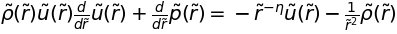

In [9]:
tilde_p = sympy.Symbol(r'\tilde{p}')
temp = momentum_conservation
temp = temp.subs(q, mass_source)
temp = temp.subs(rho(r).diff(r), bondi_density*tilde_rho(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(u(r).diff(r), v_w*tilde_u(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(p(r).diff(r), bondi_density*v_w**2*tilde_p(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(rho(r), bondi_density*tilde_rho(tilde_r))
temp = temp.subs(u(r), v_w*tilde_u(tilde_r))
temp = temp.subs(p(r), bondi_density*v_w**2*tilde_p(tilde_r))
temp = sympy.Eq(temp.lhs*(G*M)**eta/D/(v_w**2)**eta/v_w, 
                temp.rhs*(G*M)**eta/D/(v_w**2)**eta/v_w)
temp = temp.subs(r, bondi_radius*tilde_r)
temp = temp.simplify()
dimles_momentum_conservation = temp
dimles_momentum_conservation

Energy conservation

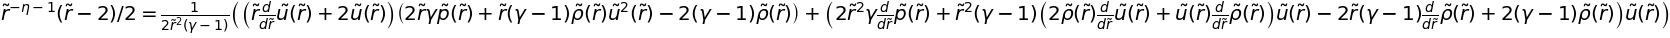

In [10]:
temp = energy_conservation
temp = temp.subs(q, mass_source)
temp = temp.subs(rho(r).diff(r), bondi_density*tilde_rho(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(u(r).diff(r), v_w*tilde_u(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(p(r).diff(r), bondi_density*v_w**2*tilde_p(tilde_r).diff(tilde_r)/bondi_radius)
temp = temp.subs(rho(r), bondi_density*tilde_rho(tilde_r))
temp = temp.subs(u(r), v_w*tilde_u(tilde_r))
temp = temp.subs(p(r), bondi_density*v_w**2*tilde_p(tilde_r))
temp = sympy.Eq(temp.lhs*(G*M)**eta/D/(v_w**2)**eta/v_w**2, 
                temp.rhs*(G*M)**eta/D/(v_w**2)**eta/v_w**2)
temp = temp.subs(r, bondi_radius*tilde_r)
temp = temp.simplify()
dimles_energy_conservation = temp
dimles_energy_conservation

Integral expressions

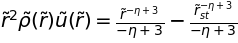

In [11]:
tilde_r_st = sympy.Symbol(r'\tilde{r}_{st}')
temp = tilde_r**(-eta)
temp *= tilde_r**2
temp = temp.simplify()
temp = temp.integrate(tilde_r,conds='none')
temp = temp - temp.subs(tilde_r, tilde_r_st)
temp = sympy.Eq(tilde_r**2*tilde_rho(tilde_r)*tilde_u(tilde_r), temp)
integral_mass_conservation = temp
integral_mass_conservation

Verification

In [12]:
temp = integral_mass_conservation
temp = temp.lhs - temp.rhs
temp = temp.diff(tilde_r)
temp = temp.subs(sympy.solve(dimles_mass_conservation,
                             tilde_rho(tilde_r).diff(tilde_r),dict=True)[0])
temp = temp.simplify()
temp

Energy conservation

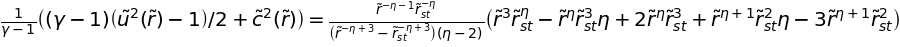

In [13]:
tilde_c = sympy.Symbol(r'\tilde{c}')
temp = -integral_mass_conservation.rhs
temp /= tilde_r**2
temp = temp.expand()
temp = temp.integrate(tilde_r,conds='none')
temp = temp - temp.subs(tilde_r, tilde_r_st)
temp = temp.simplify()
temp = temp.subs(eta**2-5*eta+6, (eta-2)*(eta-3))
temp = sympy.Eq(tilde_u(tilde_r)**2/2-sympy.Rational(1,2) + tilde_c(tilde_r)**2/(gamma-1),
               temp/integral_mass_conservation.rhs)
temp = temp.simplify()
integral_energy_conservation = temp
integral_energy_conservation

Verification

In [14]:
temp = integral_energy_conservation
temp = temp.subs(tilde_c(tilde_r), sympy.sqrt(gamma*tilde_p(tilde_r)/tilde_rho(tilde_r)))
temp = sympy.Eq(temp.lhs*integral_mass_conservation.lhs,
                temp.rhs*integral_mass_conservation.rhs)
temp = temp.lhs - temp.rhs
temp = temp.diff(tilde_r)
temp -= (dimles_energy_conservation.rhs-dimles_energy_conservation.lhs)*tilde_r**2
temp = temp.subs(sympy.solve(dimles_mass_conservation,tilde_rho(tilde_r).diff(tilde_r),dict=True)[0])
temp = temp.subs(sympy.solve(integral_mass_conservation,tilde_rho(tilde_r),dict=True)[0])
temp = temp.subs(sympy.solve([dimles_mass_conservation,
                              dimles_momentum_conservation,
                              dimles_energy_conservation],
                             [tilde_p(tilde_r).diff(tilde_r),
                             tilde_rho(tilde_r).diff(tilde_r),
                             tilde_u(tilde_r).diff(tilde_r)]))                           
temp = temp.simplify()
temp = temp.subs(sympy.solve(integral_mass_conservation,tilde_rho(tilde_r),dict=True)[0])
temp.simplify()

# Solutions without Gravity
In this case the fluid velocity and the speed of sound are constant. The density is a single power law

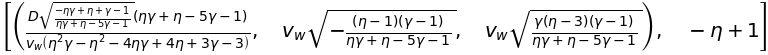

In [15]:
c = sympy.Symbol('c')
alpha = sympy.Symbol('alpha')
A = sympy.Symbol('A')
temp = [mass_conservation,momentum_conservation,energy_conservation]
temp = map(lambda eqn: eqn.subs(q,mass_source), temp)
temp = map(lambda eqn: eqn.subs(p(r),rho(r)*c(r)**2/gamma), temp)
temp = map(lambda eqn: eqn.doit(), temp)
temp = map(lambda eqn: eqn.subs(M,0), temp)
temp = map(lambda eqn: eqn.subs(u(r).diff(r),0), temp)
temp = map(lambda eqn: eqn.subs(c(r).diff(r),0), temp)
temp = map(lambda eqn: eqn.subs(rho(r),A*r**alpha),temp)
temp = map(lambda eqn: eqn.doit(), temp)
temp = map(lambda eqn: eqn.simplify(), temp)
temp = list(temp)
asymptotic_density_index = sympy.solve(sympy.Eq(sympy.log(temp[0].lhs).diff(r)*r,
         (sympy.log(temp[0].rhs).diff(r)*r).subs(u(r).diff(r),0)),alpha)[0]
temp = map(lambda eqn: eqn.subs(alpha,asymptotic_density_index), temp)
asymptotic_prefactors = sympy.solve(temp,[A,u(r),c(r)])[1]
[asymptotic_prefactors,asymptotic_density_index]

Asymptotic Mach number

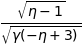

In [16]:
Q = sympy.Symbol('Q',positive=True)
temp = asymptotic_prefactors[1]/asymptotic_prefactors[2]
temp = temp.subs(eta*gamma+eta-5*gamma-1,-Q)
temp = sympy.expand_power_base(temp)
temp = temp.simplify()
temp = temp.subs(gamma-1,Q)
temp = temp.simplify()
asymptotic_mach_number = temp
asymptotic_mach_number

More simplification for the density prefactor

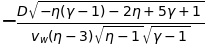

In [17]:
temp = asymptotic_prefactors[0]
temp = temp.subs(eta,Q+1)
temp = temp.simplify()
temp = temp.subs(Q,eta-1)
temp = temp.subs(eta,Q+3)
temp = temp.simplify()
temp = temp.subs(Q,eta-3)
temp = temp.subs(gamma,Q+1)
temp = temp.simplify()
temp = temp.subs(Q,gamma-1)
temp = temp.subs(eta*(gamma-1)+2*eta-5*gamma-1,-Q)
temp = temp.simplify()
temp = temp.subs(Q,-(eta*(gamma-1)+2*eta-5*gamma-1))
temp

The flow is supersonic at large distances when $\eta$ is greater than

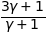

In [18]:
sympy.solve(asymptotic_mach_number-1,eta)[0]

# Slow Injection velocity

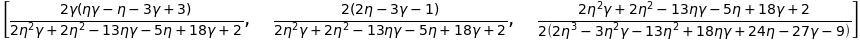

In [49]:
A_c = sympy.Symbol('A_c', positive=True)
A_d = sympy.Symbol('A_d', positive=True)
A_u = sympy.Symbol('A_u', positive=True)
xi = sympy.Symbol('xi', positive=True)
temp = [mass_conservation,
        momentum_conservation,
        energy_conservation]
temp = [itm.subs(q, D*r**(-eta)) for itm in temp]
temp = [itm.subs(v_w,0) for itm in temp]
temp = [itm.subs(p(r), rho(r)*c(r)**2/gamma) for itm in temp]
temp = [itm.subs(u(r), -sympy.sqrt(A_u*G*M/r)) for itm in temp]
temp = [itm.subs(c(r), sympy.sqrt(A_c*G*M/r)) for itm in temp]
temp = [itm.subs(rho(r), sympy.sqrt(A_d)*D*r**(sympy.Rational(3,2)-eta)/sympy.sqrt(G*M)) for itm in temp]
temp = [itm.doit().simplify() for itm in temp]
temp = sympy.solve(temp,[A_c, A_u, A_d])[0]
temp = [itm.subs(eta,xi+3) for itm in temp]
temp = [itm.subs(xi,eta-3).simplify() for itm in temp]
temp

# Free - fall solution
Very close to the SMBH

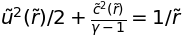

In [20]:
freefall_integral_energy = sympy.Eq(
    tilde_u(tilde_r)**2/2+tilde_c(tilde_r)**2/(gamma-1),
    1/tilde_r)
freefall_integral_energy

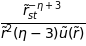

In [21]:
temp = integral_mass_conservation
temp = temp.subs(tilde_r**(3-eta),0)
freefall_density = sympy.solve(temp,tilde_rho(tilde_r))[0]
freefall_density

In [22]:
freefall_u_ansatz = sympy.sqrt(A)/sympy.sqrt(tilde_r)

In [23]:
temp = dimles_momentum_conservation
temp = temp.subs(tilde_r**(-eta),0)
temp = temp.subs(tilde_p(tilde_r), tilde_rho(tilde_r)*tilde_c(tilde_r)**2/gamma)
temp = temp.subs(tilde_rho(tilde_r), freefall_density)
temp = temp.subs(sympy.solve(freefall_integral_energy,tilde_c(tilde_r)**2,dict=True)[0])
temp = temp.subs(tilde_u(tilde_r), freefall_u_ansatz)
temp = temp.doit()
temp = temp.lhs - temp.rhs
temp = temp.simplify()
temp = sympy.solve(temp,A)[0]
freefall_u = -freefall_u_ansatz.subs(A,temp)
freefall_u

This is true unless $\gamma = \frac{5}{3}$

In [24]:
temp = dimles_momentum_conservation
temp = temp.subs(tilde_r**(-eta),0)
temp = temp.subs(tilde_p(tilde_r), tilde_rho(tilde_r)*tilde_c(tilde_r)**2/gamma)
temp = temp.subs(tilde_rho(tilde_r), freefall_density)
temp = temp.subs(sympy.solve(freefall_integral_energy,tilde_c(tilde_r)**2,dict=True)[0])
temp = temp.subs(tilde_u(tilde_r), freefall_u_ansatz)
temp = temp.doit()
temp = temp.lhs - temp.rhs
temp = temp.subs(gamma,sympy.Rational(5,3))
temp = temp.simplify()
temp

# Secular analytic solution

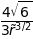

In [25]:
temp = asymptotic_prefactors[0]/tilde_r**sympy.Rational(3,2)
temp = temp.subs(gamma,sympy.Rational(5,3))
temp = temp.subs(eta,sympy.Rational(5,2))
secular_rho = temp/(D/v_w)
secular_rho

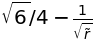

In [26]:
temp = dimles_mass_conservation
temp = temp.subs(tilde_rho(tilde_r), secular_rho)
temp = temp.doit()
temp = temp.subs(eta,sympy.Rational(5,2))
temp = sympy.dsolve(temp,tilde_u(tilde_r))
temp = temp.subs(sympy.Symbol('C1'),-1)
secular_u = temp.rhs 
secular_u

In [27]:
secular_stagnation = sympy.solve(secular_u,tilde_r)[0]
secular_stagnation

In [28]:
temp = integral_energy_conservation
temp = temp.subs(tilde_u(tilde_r),secular_u)
temp = temp.subs(tilde_r_st, secular_stagnation)
temp = temp.subs(eta,sympy.Rational(5,2))
temp = temp.subs(gamma,sympy.Rational(5,3))
temp = sympy.solve(temp,tilde_c(tilde_r)**2)[0]
temp = temp.subs(tilde_r,Q**2)
temp = temp.simplify()
temp = temp.subs(Q,sympy.sqrt(tilde_r))
secular_c2 = temp
secular_c2

Verification

In [29]:
temp = [dimles_mass_conservation,dimles_momentum_conservation,dimles_energy_conservation]
temp = map(lambda eqn:eqn.subs(tilde_p(tilde_r),tilde_rho(tilde_r)*tilde_c(tilde_r)**2/gamma),temp)
temp = map(lambda eqn:eqn.subs(tilde_c(tilde_r)**2,secular_c2),temp)
temp = map(lambda eqn:eqn.subs(tilde_rho(tilde_r),secular_rho),temp)
temp = map(lambda eqn:eqn.subs(tilde_u(tilde_r),secular_u),temp)
temp = map(lambda eqn:eqn.subs({gamma:sympy.Rational(5,3),eta:sympy.Rational(5,2)}),temp)
temp = map(lambda eqn:eqn.doit(),temp)
temp = map(lambda eqn:eqn.lhs-eqn.rhs,temp)
temp = map(lambda eqn:eqn.simplify(),temp)
list(temp)

# Integrating ODEs

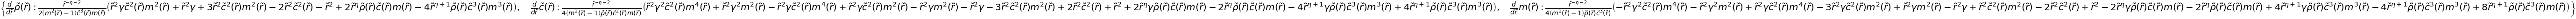

In [30]:
m = sympy.Symbol('m') # Mach number
temp = [dimles_mass_conservation,
        dimles_momentum_conservation,
        dimles_energy_conservation]
temp = [itm.subs(tilde_u(tilde_r), tilde_c(tilde_r)*m(tilde_r)) for itm in temp]
temp = [itm.subs(tilde_p(tilde_r), tilde_rho(tilde_r)*tilde_c(tilde_r)**2/gamma) for itm in temp]
temp = [itm.doit() for itm in temp]
isolated_odes = sympy.solve(temp, [m(tilde_r).diff(tilde_r),
                                   tilde_c(tilde_r).diff(tilde_r),
                                   tilde_rho(tilde_r).diff(tilde_r)])
isolated_odes

Determining the values of the variables at the sonic point

In [31]:
temp = integral_energy_conservation
temp = temp.subs(tilde_u(tilde_r), tilde_c(tilde_r))
raw_sonic_point_sound_speed = sympy.solve(temp, tilde_c(tilde_r))[1]

In [32]:
temp = integral_mass_conservation.subs(tilde_u(tilde_r), tilde_c(tilde_r))
temp = temp.subs(tilde_c(tilde_r), raw_sonic_point_sound_speed)
raw_sonic_point_density = sympy.solve(temp, tilde_rho(tilde_r))[0].simplify()

In [33]:
temp = tilde_rho(tilde_r).diff(tilde_r)
temp = temp.subs(isolated_odes)
temp = sympy.fraction(temp)[0]
temp = temp.subs(tilde_rho(tilde_r), raw_sonic_point_density)
temp = temp.subs(tilde_c(tilde_r), raw_sonic_point_sound_speed)
temp = temp.subs(m(tilde_r), 1)
temp = temp*tilde_r**(eta+2)
outer_sonic_equation = temp

To find the position of the outer sonic point, one must solve this horrible equation

In [34]:
def find_outer_sonic_point(gamma_val, eta_val, rst_val):
    
    from mpmath import findroot
    
    eqn = outer_sonic_equation
    eqn = eqn.subs({eta:eta_val,
                   gamma:gamma_val,
                   tilde_r_st:rst_val})
    deqn = eqn.diff(tilde_r)
    eqn = sympy.lambdify(tilde_r, eqn)
    deqn = sympy.lambdify(tilde_r, deqn)
    return float(findroot(eqn, 10*rst_val, df=deqn))
find_outer_sonic_point(4./3., 2.9, 9.1)

In [35]:
def find_inner_sonic_point(gamma_val, eta_val, rst_val):
    
    from mpmath import findroot
    
    eqn = outer_sonic_equation
    eqn = eqn.subs({eta:eta_val,
                   gamma:gamma_val,
                   tilde_r_st:rst_val})
    deqn = eqn.diff(tilde_r)
    eqn = sympy.lambdify(tilde_r, eqn)
    deqn = sympy.lambdify(tilde_r, deqn)
    return float(findroot(eqn, 0.1*rst_val, df=deqn))
find_inner_sonic_point(4./3., 2.9, 9.1)

Integration from the sonic point to the stagnation point

<IPython.core.display.Javascript object>


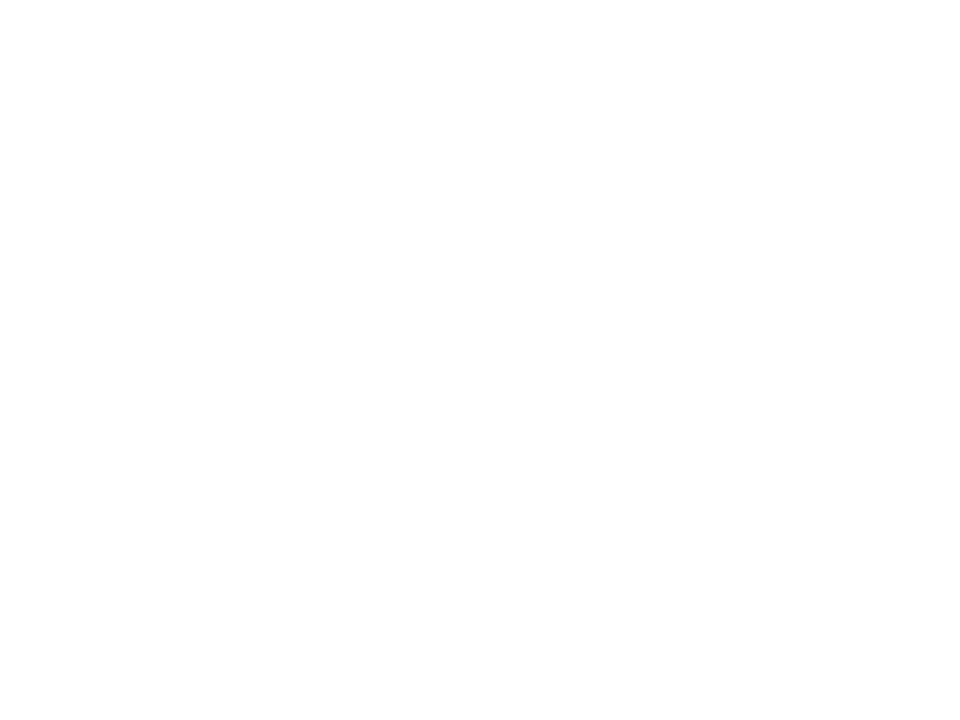

In [36]:
def integrate_outer(gamma_val, eta_val, rst_val):
    
    from scipy.integrate import ode
    import numpy
    
    sub_params = {eta:eta_val,
                 gamma:gamma_val,
                  tilde_r_st:rst_val}
    
    # Differential equations
    hydrodynamic_variables = [m,
                             tilde_c,
                             tilde_rho]
    explicit_odes = [itm(tilde_r).diff(tilde_r) for itm in hydrodynamic_variables]
    explicit_odes = [itm.subs(isolated_odes) for itm in explicit_odes]
    explicit_odes = [itm.subs(sub_params) for itm in explicit_odes]
    for var in hydrodynamic_variables:
        explicit_odes = [itm.subs(var(tilde_r), var) for itm in explicit_odes]
    raw_deriv_func = sympy.lambdify([tilde_r, m, tilde_c, tilde_rho], explicit_odes)
    deriv_wrapper = lambda x,y: raw_deriv_func(x,y[0],y[1],y[2])
    
    outer_sonic_point = find_outer_sonic_point(gamma_val, eta_val, rst_val)
    outer_density = raw_sonic_point_density.subs(sub_params).subs(tilde_r,outer_sonic_point)
    outer_sound_speed = raw_sonic_point_sound_speed.subs(sub_params).subs(tilde_r,outer_sonic_point)
    r_start_outer = (1.0-1e-3)*outer_sonic_point
    r_stop_outer = (1+1e-2)*rst_val
    dr_outer = 1e-4*(r_start_outer - r_stop_outer)
        
    outer_init_cond = [1-1e-3, outer_sound_speed, outer_density]
    
    integrator = ode(deriv_wrapper)
    integrator.set_initial_value(outer_init_cond, r_start_outer)
    x_list = []
    y_list = []
    while integrator.successful() and integrator.t>r_stop_outer:
        integrator.integrate(integrator.t - dr_outer)
        x_list.append(integrator.t)
        y_list.append(integrator.y)
    assert(integrator.successful())
    x_list = numpy.array(x_list)
    y_list = numpy.array(y_list)
    return x_list, y_list
    
import pylab
x_list, y_list = integrate_outer(4./3., 2.9, 9.1)
%matplotlib notebook
pylab.plot(x_list ,y_list.T[0])
pylab.xlabel(r'$\tilde{r}$')
pylab.ylabel('Mach number')
pass

In [37]:
def integrate_inner(gamma_val, eta_val, rst_val):
    
    from scipy.integrate import ode
    import numpy
    
    sub_params = {eta:eta_val,
                 gamma:gamma_val,
                  tilde_r_st:rst_val}
    
    # Differential equations
    hydrodynamic_variables = [m,
                             tilde_c,
                             tilde_rho]
    explicit_odes = [itm(tilde_r).diff(tilde_r) for itm in hydrodynamic_variables]
    explicit_odes = [itm.subs(isolated_odes) for itm in explicit_odes]
    explicit_odes = [itm.subs(sub_params) for itm in explicit_odes]
    for var in hydrodynamic_variables:
        explicit_odes = [itm.subs(var(tilde_r), var) for itm in explicit_odes]
    raw_deriv_func = sympy.lambdify([tilde_r, m, tilde_c, tilde_rho], explicit_odes)
    deriv_wrapper = lambda x,y: raw_deriv_func(x,y[0],y[1],y[2])
    
    inner_sonic_point = find_inner_sonic_point(gamma_val, eta_val, rst_val)
    bc_density = -raw_sonic_point_density.subs(sub_params).subs(tilde_r,inner_sonic_point)
    bc_sound_speed = raw_sonic_point_sound_speed.subs(sub_params).subs(tilde_r,inner_sonic_point)
    r_stop = (1-1e-2)*rst_val
    dr = 1e-4*(r_stop - inner_sonic_point)   
    r_start = inner_sonic_point+0.5*dr
    init_cond = [-1+1e-3, bc_sound_speed, bc_density]
    
    integrator = ode(deriv_wrapper)
    integrator.set_initial_value(init_cond, r_start)
    x_list = []
    y_list = []
    while integrator.successful() and integrator.t<r_stop:
        integrator.integrate(integrator.t + dr)
        x_list.append(integrator.t)
        y_list.append(integrator.y)
    assert(integrator.successful())
    x_list = numpy.array(x_list)
    y_list = numpy.array(y_list)
    return x_list, y_list
    
import pylab
x_list, y_list = integrate_inner(4./3., 2.9, 9.1)
%matplotlib notebook
pylab.plot(x_list ,y_list.T[0])
pylab.xlabel(r'$\tilde{r}$')
pylab.ylabel('Mach number')
pass

/usr/local/lib/python2.7/dist-packages/scipy/integrate/_ode.py:927: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))


AssertionError: 

In [ ]:
def calc_stagnation_derivative_difference(gamma_val, eta_val, rst_val, verbose=False):
    x_outer, y_outer = integrate_outer(gamma_val, eta_val, rst_val)
    x_inner, y_inner = integrate_inner(gamma_val, eta_val, rst_val)
    m_outer = y_outer.T[0]
    m_inner = y_inner.T[0]
    deriv_outer = (m_outer[-1]-m_outer[-2])/(x_outer[-1] - x_outer[-2])
    deriv_inner = (m_inner[-1]-m_inner[-2])/(x_inner[-1] - x_inner[-2])
    if verbose:
        print('called with', rst_val, 'evaluated', deriv_outer - deriv_inner)
    return deriv_outer - deriv_inner

calc_stagnation_derivative_difference(4./3., 2.9, 9.1)

In [ ]:
calc_stagnation_derivative_difference(4./3., 2.9, 3.9)

Finall, we can numerically solve for the location of the stagnation point

In [ ]:
from mpmath import findroot

findroot(lambda x: calc_stagnation_derivative_difference(4./3., 2.9, x, verbose=True), 3.9, tol=1e-3)

In [ ]:
findroot(lambda x: calc_stagnation_derivative_difference(4./3., 2.8, x, verbose=True), 4.1, tol=1e-3)

In [ ]:
findroot(lambda x: calc_stagnation_derivative_difference(4./3., 2.7, x, verbose=True), 4.1, tol=1e-3)

In [ ]:
findroot(lambda x: calc_stagnation_derivative_difference(4./3., 2.67, x, verbose=True), 4.3, tol=1e-3)

In [ ]:
findroot(lambda x: calc_stagnation_derivative_difference(4./3.-0.01, 3.1, x, verbose=True), 8, tol=1e-3)